In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Import claims_data.csv and cust_data.csv which is provided to you and
combine the two datasets appropriately to create a 360-degree view of
the data. Use the same for the subsequent questions.


In [3]:
claims = pd.read_csv(r"D:\000- study-analytix\4 - python\Python-Case study\5. Python Foundation Case Study 3 - Insurance Claims Case Study-man\Case Study 3 - Insurance Claims Case Study\claims1.csv")
demo = pd.read_csv(r"D:\000- study-analytix\4 - python\Python-Case study\5. Python Foundation Case Study 3 - Insurance Claims Case Study-man\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv",encoding="utf-8")
demo.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [4]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,"$2,980",1.0,No
1,33985796,75740424,Crime,10-03-18,Home,Unknown,Material only,"$2,980",3.0,No


Perform a data audit for the datatypes and find out if there are any
mismatch within the current datatypes of the columns and their
business significance.

In [5]:
claims.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [5]:
cust_claims= claims.merge(demo, left_on=['customer_id'], right_on=['CUST_ID'], how='inner')
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,"$2,980",1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10-03-18,Home,Unknown,Material only,"$2,980",3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02-02-18,Auto,No,Material only,"$3,369.50",1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04-04-18,Auto,No,Material only,"$1,950",6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,"$1,680",1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09-06-18,Auto,Yes,Material only,"$1,770",1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05-09-17,Home,No,Material only,"$2,800",1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,"$33,080",2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,"$2,840",4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


cust_claims["DateOfBirth"] = pd.to_datetime(cust_claims.DateOfBirth, format = "%d-%b-%y")
cust_claims.loc[(cust_claims.DateOfBirth.dt.year > 2020),"DateOfBirth"]=cust_claims[cust_claims.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
#cust_claims["claim_date"] = pd.to_datetime(cust_claims.claim_date, format = "%m/%d/%Y")
#cust_claims["Contact"] = pd.to_numeric(cust_claims.Contact.str.replace("-",""),downcast='float')
cust_claims["claim_amount"] = pd.to_numeric(cust_claims.claim_amount.str.replace("$",""),downcast='float')
cust_claims.head(2)

In [6]:
cust_claims["DateOfBirth"] = pd.to_datetime(cust_claims.DateOfBirth, format = "%d-%b-%y")
cust_claims.loc[(cust_claims.DateOfBirth.dt.year > 2020),"DateOfBirth"]=cust_claims[cust_claims.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

In [7]:
cust_claims["claim_date"] = pd.to_datetime(cust_claims.claim_date, format = "%m/%d/%Y")
#cust_claims["claim_date"] = pd.to_datetime(cust_claims.claim_date, format='%m-%d-%y')


ValueError: time data '10-03-18' does not match format '%m/%d/%Y' (match)

In [35]:
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,"$2,980",1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10-03-18,Home,Unknown,Material only,"$2,980",3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02-02-18,Auto,No,Material only,"$3,369.50",1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04-04-18,Auto,No,Material only,"$1,950",6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,"$1,680",1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09-06-18,Auto,Yes,Material only,"$1,770",1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05-09-17,Home,No,Material only,"$2,800",1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,"$33,080",2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,"$2,840",4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


Convert the column claim_amount to numeric. Use the appropriate
modules/attributes to remove the $ sign.

In [29]:
cust_claims["claim_amount"]= cust_claims['claim_amount'].astype(str)
cust_claims['claim_amount'] = cust_claims['claim_amount'].str.replace('$','')
cust_claims['claim_amount']= np.where(cust_claims.claim_amount== "nan","",cust_claims.claim_amount )

C:\Users\manish\AppData\Local\Temp\ipykernel_10188\2567127729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims["claim_amount"]= cust_claims['claim_amount'].astype(str)
C:\Users\manish\AppData\Local\Temp\ipykernel_10188\2567127729.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claims['claim_amount'] = cust_claims['claim_amount'].str.replace('$','')
C:\Users\manish\AppData\Local\Temp\ipykernel_10188\2567127729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [30]:
# Remove commas from the 'claim_amount' column
cust_claims['claim_amount'] = cust_claims['claim_amount'].str.replace(',', '')

# Convert the 'claim_amount' column to numeric format
cust_claims['claim_amount'] = pd.to_numeric(cust_claims['claim_amount'])

C:\Users\manish\AppData\Local\Temp\ipykernel_10188\598528616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['claim_amount'] = cust_claims['claim_amount'].str.replace(',', '')
C:\Users\manish\AppData\Local\Temp\ipykernel_10188\598528616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['claim_amount'] = pd.to_numeric(cust_claims['claim_amount'])


In [31]:
cust_claims.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date                     object
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
unreported_claims               int32
age                             int64
AgeGroup                       object
Frauds                          int32
claim_month                     int64
Claim_month                     int64
dtype: object

QUE-4 Of all the injury claims, some of them have gone unreported with the
   police. Create an alert flag (1,0) for all such claims.

In [8]:
cust_claims['unreported_claims']= np.where(cust_claims.police_report== 'Unknown',1,0)
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,"$2,980",1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,10-03-18,Home,Unknown,Material only,"$2,980",3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,02-02-18,Auto,No,Material only,"$3,369.50",1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,04-04-18,Auto,No,Material only,"$1,950",6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,"$1,680",1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09-06-18,Auto,Yes,Material only,"$1,770",1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,05-09-17,Home,No,Material only,"$2,800",1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,"$33,080",2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,"$2,840",4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,0


Que-5-Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.

In [9]:
cust_claims= cust_claims.drop_duplicates(subset="customer_id", keep= "last")
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,"$2,980",1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,10-03-18,Home,Unknown,Material only,"$2,980",3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1
3,63017412,30308357,Driver error,04-04-18,Auto,No,Material only,"$1,950",6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
5,91609100,47830476,Natural causes,04-12-17,Auto,Unknown,Material only,"$1,440",1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1
7,39219616,19269962,Other causes,09/26/2018,Auto,No,Material only,"$2,240",2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09-06-18,Auto,Yes,Material only,"$1,770",1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,05-09-17,Home,No,Material only,"$2,800",1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,"$33,080",2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,"$2,840",4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,0


Que-6 -Check for missing values and impute the missing values with an
appropriate value. (mean for continuous and mode for categorical)

In [46]:
cust_claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
unreported_claims       0
dtype: int64

In [11]:
cust_claims["claim_amount"]= cust_claims['claim_amount'].replace(np.NaN,cust_claims['claim_amount'].mean())
cust_claims["claim_amount"].isna().sum()

TypeError: can only concatenate str (not "int") to str

In [12]:
cust_claims.info()
cust_claims["total_policy_claims"] = cust_claims['total_policy_claims'].fillna(cust_claims['total_policy_claims'].mode()[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1078 non-null   int64         
 1   customer_id          1078 non-null   int64         
 2   incident_cause       1078 non-null   object        
 3   claim_date           1078 non-null   object        
 4   claim_area           1078 non-null   object        
 5   police_report        1078 non-null   object        
 6   claim_type           1078 non-null   object        
 7   claim_amount         1013 non-null   object        
 8   total_policy_claims  1068 non-null   float64       
 9   fraudulent           1078 non-null   object        
 10  CUST_ID              1078 non-null   int64         
 11  gender               1078 non-null   object        
 12  DateOfBirth          1078 non-null   datetime64[ns]
 13  State                1078 non-nul

C:\Users\manish\AppData\Local\Temp\ipykernel_10188\1585317901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims["total_policy_claims"] = cust_claims['total_policy_claims'].fillna(cust_claims['total_policy_claims'].mode()[0])


Que - 7  -Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [13]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(cust_claims['DateOfBirth']).year          #extracting year from DateOfBirth
x = dob_year-100                                                      # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
cust_claims['age'] = (np.where(dob_year > curr_year,v,y))

C:\Users\manish\AppData\Local\Temp\ipykernel_10188\621922753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['age'] = (np.where(dob_year > curr_year,v,y))


In [14]:
cust_claims.loc[(cust_claims.age < 18),'AgeGroup'] = 'Children'
cust_claims.loc[(cust_claims.age >=18) & (cust_claims.age <30),'AgeGroup'] = 'Youth'
cust_claims.loc[(cust_claims.age >=30) & (cust_claims.age <60),'AgeGroup'] = 'Adult'
cust_claims.loc[(cust_claims.age >=60),'AgeGroup'] ='Senior'

C:\Users\manish\AppData\Local\Temp\ipykernel_10188\2548578728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims.loc[(cust_claims.age < 18),'AgeGroup'] = 'Children'


In [59]:
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age,AgeGroup
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,0,45,Adult
1,33985796,75740424,Crime,10-03-18,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,1,54,Adult
3,63017412,30308357,Driver error,04-04-18,Auto,No,Material only,1950.0,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,0,40,Adult
5,91609100,47830476,Natural causes,04-12-17,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver,1,38,Adult
7,39219616,19269962,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,19269962,Male,13-May-77,NV,956-871-8691,Gold,0,47,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09-06-18,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,0,43,Adult
1081,63269067,42364152,Other causes,05-09-17,Home,No,Material only,2800.0,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,0,28,Youth
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,0,34,Adult
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,0,60,Senior


In [63]:
cust_claims.groupby(["AgeGroup"])["age"].count()

AgeGroup
Adult     805
Senior    132
Youth     141
Name: age, dtype: int64

Que - 8 -What is the average amount claimed by the customers from various
segments?

In [64]:
Avg_amount_segment= round(cust_claims.groupby(["Segment"])["claim_amount"].mean(),2)
Avg_amount_segment

Segment
Gold        12846.39
Platinum    12371.64
Silver      12267.15
Name: claim_amount, dtype: float64

Que - 9- What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.

In [65]:
Amount_incedent= round(cust_claims.loc[cust_claims.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_"),2)
Amount_incedent

incident_cause
total_Crime                  756727.45
total_Driver error          3593933.83
total_Natural causes        1384830.90
total_Other causes          4222924.79
total_Other driver error    3518188.85
Name: claim_amount, dtype: float64

How many adults from TX, DE and AK claimed insurance for driver
related issues and causes?

In [66]:
Adults_claims_count= cust_claims.loc[(cust_claims.incident_cause.str.lower().str.contains("driver") & (cust_claims.State== "TX") | (cust_claims.State== "DE") | (cust_claims.State== "AK")) ].groupby(["State"])["claim_amount"].count()

In [67]:
Adults_claims_count

State
AK    19
DE    29
TX    10
Name: claim_amount, dtype: int64

Que-11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [69]:
Claim_gender_segment= round(cust_claims.groupby(["Segment", "gender"])["claim_amount"].sum().reset_index(),2)
Claim_gender_segment


,Segment,gender,claim_amount
0,Gold,Female,2110042.41
1,Gold,Male,2655966.87
2,Platinum,Female,2369720.43
3,Platinum,Male,2096443.42
4,Silver,Female,1897301.87
5,Silver,Male,2347130.84


In [70]:
Claim_gender_segment_pivot= Claim_gender_segment.pivot(index="Segment", columns= "gender", values= "claim_amount")
Claim_gender_segment_pivot

gender,Female,Male
Segment,,
Gold,2110042.41,2655966.87
Platinum,2369720.43,2096443.42
Silver,1897301.87,2347130.84


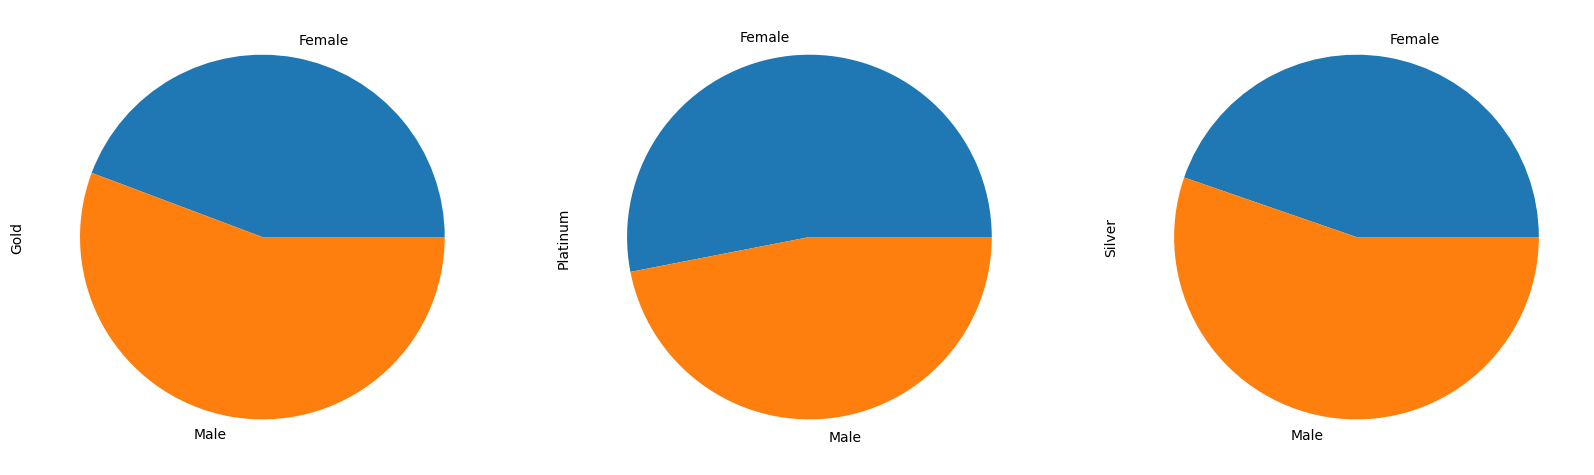

In [71]:
Claim_gender_segment_pivot.T.plot(kind="pie", subplots= True, legend= False,figsize=(20,10))
plt.show()

Que-12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [72]:
Claim_gender_driver= cust_claims.loc[(cust_claims.incident_cause.str.lower().str.contains("driver"))].groupby(["gender"])[["gender"]].count().add_prefix("countOf_").reset_index()
Claim_gender_driver


,gender,countOf_gender
0,Female,221
1,Male,281


[]

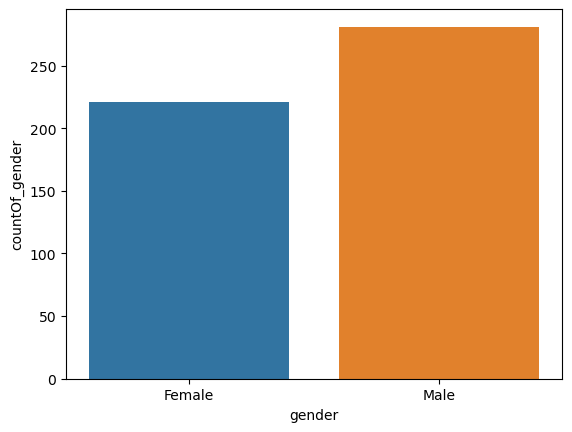

In [73]:
sns.barplot(x= "gender", y= "countOf_gender", data= Claim_gender_driver)
plt.plot()

Que-13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [16]:
cust_claims["Frauds"]= np.where(cust_claims.fraudulent == "Yes",1,0)

C:\Users\manish\AppData\Local\Temp\ipykernel_10188\3577232768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims["Frauds"]= np.where(cust_claims.fraudulent == "Yes",1,0)


In [18]:
AgeGroup_max_frauds= cust_claims.groupby(["AgeGroup"])["Frauds"].sum().reset_index()
AgeGroup_max_frauds

,AgeGroup,Frauds
0,Adult,185
1,Senior,35
2,Youth,25


[]

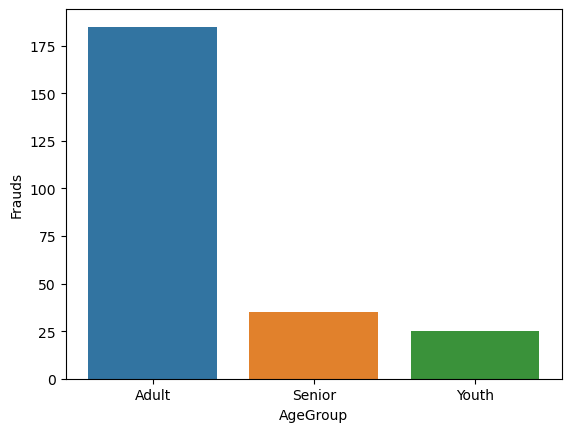

In [19]:
sns.barplot(x= "AgeGroup", y="Frauds", data=AgeGroup_max_frauds )
plt.plot()

14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [25]:
cust_claims['claim_month'] = pd.to_datetime(cust_claims['claim_date'])
cust_claims['claim_month'] = cust_claims['claim_month'].dt.month

C:\Users\manish\AppData\Local\Temp\ipykernel_10188\3951268561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['claim_month'] = pd.to_datetime(cust_claims['claim_date'])
C:\Users\manish\AppData\Local\Temp\ipykernel_10188\3951268561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['claim_month'] = cust_claims['claim_month'].dt.month


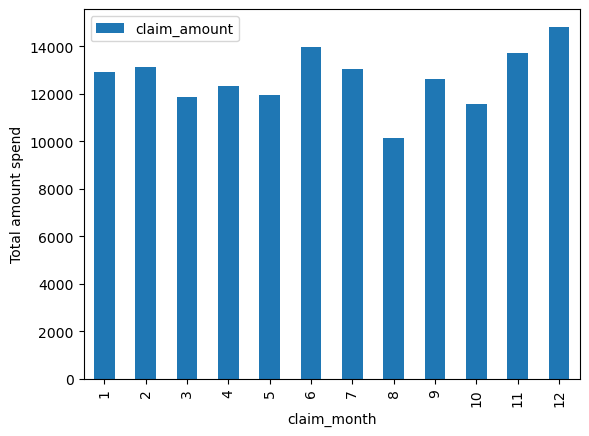

In [32]:
pd.pivot_table(cust_claims,index="claim_month",values="claim_amount").plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()

Que-15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [34]:
Frauds_amount_gender= pd.DataFrame(cust_claims.loc[(cust_claims.fraudulent=="Yes")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Fraud_"))
Non_Frauds_amount_gender=pd.DataFrame(cust_claims.loc[(cust_claims.fraudulent=="No")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))

In [35]:
Claims_age_gender=round(pd.merge(Frauds_amount_gender,Non_Frauds_amount_gender, on=["gender","AgeGroup"]),2)

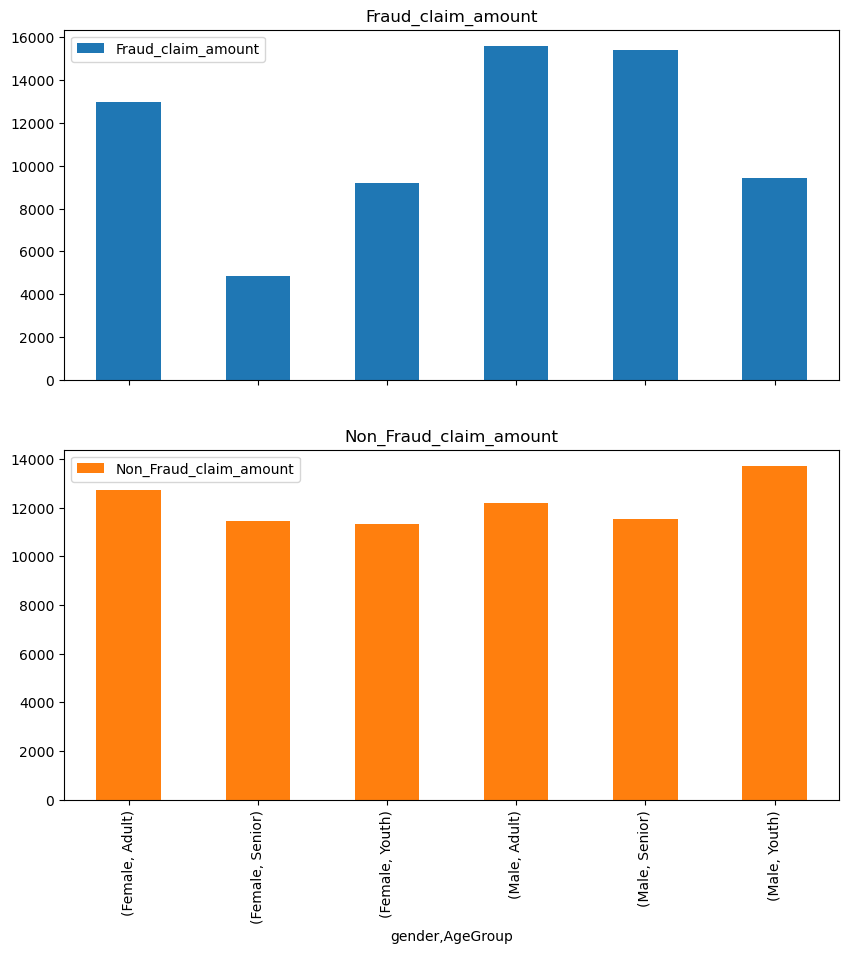

In [36]:
Claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()

Que-16. Is there any similarity in the amount claimed by males and females?

In [38]:
claim_male = cust_claims['claim_amount'].loc[cust_claims['gender']=="Male"]
claim_female = cust_claims['claim_amount'].loc[cust_claims['gender']=="Female"]

In [39]:
print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12911.626213592233
The average amount claimed by females is 12077.352409638554


In [40]:
import scipy.stats as stats

In [41]:
eq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=True)    # equal variance
eq_var.statistic

nan

In [42]:
uneq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=False)    # UnEqual variance
uneq_var.statistic

nan

In [43]:
t= eq_var.statistic
p= eq_var.pvalue

print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

 For the above test, the t-score is nan and the p-value is nan
We fail to reject null hypothesis


Que-17. Is there any relationship between age category and segment?

In [45]:
# To find out this relationship we will use Chi Square test

# H0= No relation between category and segment;
# Ha= There is a relationship between category and segment

In [47]:
agecat_seg = pd.crosstab(cust_claims.AgeGroup, cust_claims.Segment, margins = True)
agecat_seg

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,278,270,257,805
Senior,45,47,40,132
Youth,48,44,49,141
All,371,361,346,1078


In [48]:
Chi_test = stats.chi2_contingency(observed= agecat_seg)
Chi_test

(0.8591966330667935,
 0.9996992437870238,
 9,
 array([[ 277.04545455,  269.57792208,  258.37662338,  805.        ],
        [  45.42857143,   44.20408163,   42.36734694,  132.        ],
        [  48.52597403,   47.21799629,   45.25602968,  141.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [49]:
print("The chi square stat is {} and the p value is {}".format(Chi_test[0],Chi_test[1]))

The chi square stat is 0.8591966330667935 and the p value is 0.9996992437870238


In [50]:
# Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis.
# Therefore there is no relationship between age category and segment

Que-18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [52]:
# Here we will check the pearson coeffecient.

# The H0=  No relationship between the 2016-17 claim amounts and current claim amounts,
# Ha= Relationship exists;
# the CI= 95%, p=0.05

In [56]:
cust_claims['claim_month'] = pd.to_datetime(cust_claims['claim_month'])
cust_claims["Year"]= cust_claims['claim_month'].dt.year

C:\Users\manish\AppData\Local\Temp\ipykernel_10188\3658139978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['claim_month'] = pd.to_datetime(cust_claims['claim_month'])
C:\Users\manish\AppData\Local\Temp\ipykernel_10188\3658139978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims["Year"]= cust_claims['claim_month'].dt.year


In [58]:
Current_year= cust_claims.loc[cust_claims.Year == 2018]["claim_amount"]
amt_2016_17= cust_claims.loc[cust_claims.Year==2017]["claim_amount"]

In [60]:
stats.pearsonr(Current_year,amt_2016_17)

ValueError: x and y must have length at least 2.

In [ ]:
# not able to perform it.

Que-19. Is there any difference between age groups and insurance claims?

In [61]:
# Here we will perform Ftest ANOVA

# H0 : mean(AgeGroup[Youth]) == mean(AgeGroup[Adult]) (No difference between age groups and insurance claims or No influence of age groups on insurance claims) Ha : mean(AgeGroup[Youth]) != mean(AgeGroup[Adult]) (There is some difference between age groups and insurance claims or there is some influence of age groups on insurance claims)

In [62]:
age_group_1 = cust_claims['total_policy_claims'].loc[cust_claims['AgeGroup']=="Youth"]
age_group_2 = cust_claims['total_policy_claims'].loc[cust_claims['AgeGroup']=="Adult"]
# Perfrom the Anova
anova = stats.f_oneway(age_group_1,age_group_2)
# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

The f-value is 0.7257860470318822 and the p value is 0.39446858447695
We fail to reject null hypothesis


In [63]:
# Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

Que-20. Is there any relationship between total number of policy claims and the claimed amount?

In [65]:
cust_claims['total_policy_claims'] = pd.to_numeric(cust_claims['total_policy_claims'])

C:\Users\manish\AppData\Local\Temp\ipykernel_10188\592632210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['total_policy_claims'] = pd.to_numeric(cust_claims['total_policy_claims'])


In [66]:
cust_claims.total_policy_claims.corr(other= cust_claims.claim_amount)

-0.023092630282753927

In [ ]:
# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount